# import modules

In [1]:
import glob
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver1_draft import *

# super contour data

In [2]:
file_pattern = "../data/TACC_super_contour_mcz30_?_2024-06-13_*.pkl"
files = glob.glob(file_pattern)

data = {}

for file in files:
    with open(file, "rb") as f:
        file = pickle.load(f)
        data.update(file)

In [3]:
test_data = data[0.017154][0.120513]["contour"]
X = test_data["omega_matrix"]
Y = test_data["theta_matrix"]
Z = test_data["epsilon_matrix"]

In [4]:
min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
omega_arr = X[min_idx[0], :]
ep_omega_arr = Z[min_idx[0], :]
popt_omega, pcov_omega = curve_fit(polynomial, omega_arr, ep_omega_arr)
a_omega, b_omega, c_omega = popt_omega
# omega_err = 1 / np.sqrt(2 * a_omega)
omega_err = a_omega
print(f"omega_err: {omega_err}")

theta_arr = Y[:, min_idx[1]]
ep_theta_arr = Z[:, min_idx[1]]
popt_theta, pcov_theta = curve_fit(polynomial, theta_arr, ep_theta_arr)
a_theta, b_theta, c_theta = popt_theta
# theta_err = 1 / np.sqrt(2 * a_theta)
theta_err = a_theta
print(f"theta_err: {theta_err}")

omega_err: 0.007404539642954228
theta_err: 0.0020280698670381847


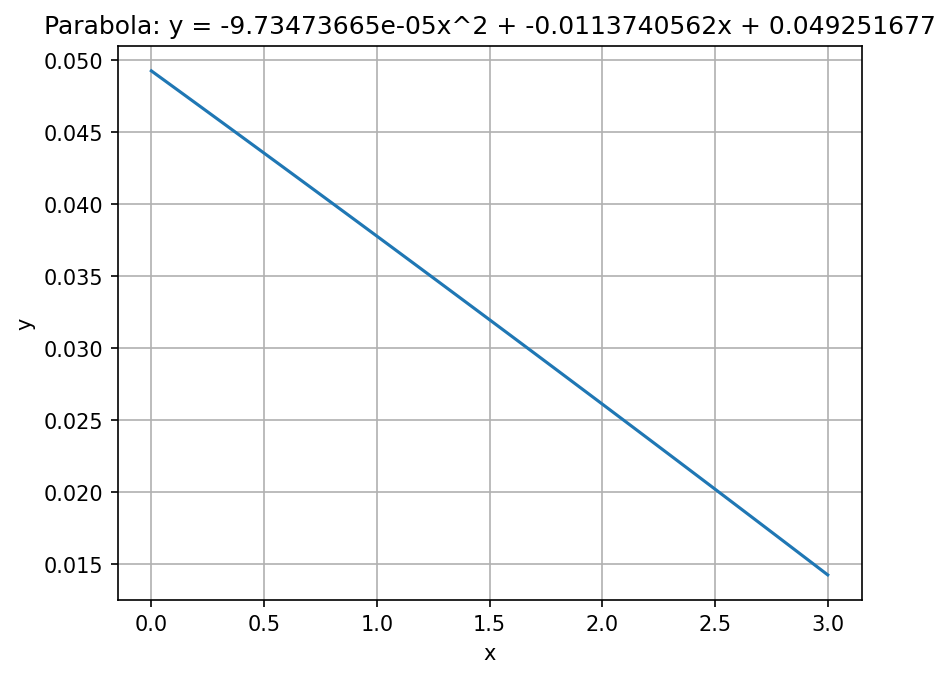

In [5]:
# Coefficients of the parabola
a = -9.73473665e-05
b = -1.13740562e-02
c = 4.92516770e-02

# Generate x values
x = np.linspace(0, 3, 100)

# Calculate y values using the quadratic equation
y = a * x**2 + b * x + c

# Plot the parabola
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parabola: y = {}x^2 + {}x + {}".format(a, b, c))
plt.grid(True)
plt.show()

In [6]:
data = get_super_contour_stats_ver1(data)
data

td:  0.016632
I:  0.1
popt_omega:  [ 0.00549579 -0.02263049  0.02521108]
popt_theta:  [ 0.00129825 -0.00452789  0.01253878]
omega_err:  9.538276769443963
theta_err:  19.624856009502654
I:  0.110256
popt_omega:  [ 0.00616473 -0.02541149  0.02814686]
popt_theta:  [ 0.00154539 -0.00665401  0.01615743]
omega_err:  9.005916125500955
theta_err:  17.987305612159687
I:  0.120513
popt_omega:  [ 0.00687266 -0.02828838  0.03108782]
popt_theta:  [ 0.0017922  -0.00880919  0.01991487]
omega_err:  8.529482678850508
theta_err:  16.702918607123262
I:  0.130769
popt_omega:  [ 0.00762311 -0.03127208  0.03403742]
popt_theta:  [ 0.00203666 -0.01097723  0.02378648]
omega_err:  8.098765680694525
theta_err:  15.668426367172327
I:  0.141026
popt_omega:  [ 0.00841376 -0.03435026  0.03698249]
popt_theta:  [ 0.00227705 -0.01314338  0.0277496 ]
omega_err:  7.708854832833103
theta_err:  14.818322943099941
I:  0.151282
popt_omega:  [ 0.0086977  -0.03639457  0.0401174 ]
popt_theta:  [ 0.00251164 -0.01529275  0.031781

FloatingPointError: invalid value encountered in sqrt

In [4]:
with open("../data/super_contour_NP_L_mcz30_2024-06-24_05-13-18.pkl", "rb") as f:
    data_NP_L = pickle.load(f)

data_NP_L

{0.011418: {0.1: {'epsilon': 0.02516657186836857,
   'source_params': {'theta_S': 1.5707963267948966,
    'phi_S': 0.7853981633974483,
    'theta_J': 0.5235987755982988,
    'phi_J': 1.0471975511965976,
    'mcz': 0.00014778722279999997,
    'dist': 1.5439068750000003e+17,
    'eta': 0.25,
    't_c': 0.0,
    'phi_c': 0.0,
    'y': 0.34831069974900647,
    'MLz': 0.011338300361027181}},
  0.110256: {'epsilon': 0.027596085809720616,
   'source_params': {'theta_S': 1.5707963267948966,
    'phi_S': 0.7853981633974483,
    'theta_J': 0.5235987755982988,
    'phi_J': 1.0471975511965976,
    'mcz': 0.00014778722279999997,
    'dist': 1.5439068750000003e+17,
    'eta': 0.25,
    't_c': 0.0,
    'phi_c': 0.0,
    'y': 0.34831069974900647,
    'MLz': 0.011338300361027181}},
  0.120513: {'epsilon': 0.029985842207819746,
   'source_params': {'theta_S': 1.5707963267948966,
    'phi_S': 0.7853981633974483,
    'theta_J': 0.5235987755982988,
    'phi_J': 1.0471975511965976,
    'mcz': 0.000147787222

# super contours

In [5]:
td_arr = np.sort(np.array([k for k in data.keys()]))  # already rounded to 6 decimals
# I_arr = np.sort(data[td_arr[0]]["I_arr"])
I_arr = np.sort(np.array([round(I, 6) for I in data[td_arr[0]]["I_arr"]]))
X, Y = np.meshgrid(td_arr, I_arr)
src_params = data[td_arr[0]]["source_params"]

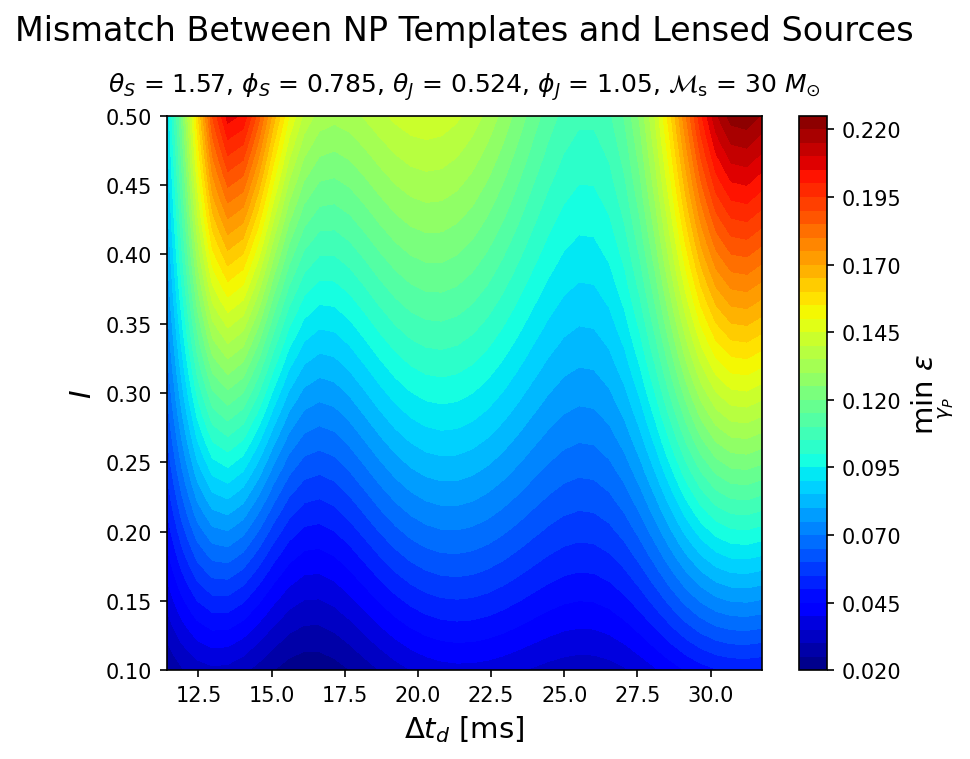

In [6]:
ep_NP_L_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_NP_L_mtx[r, c] = data_NP_L[td][I]["epsilon"]

plt.contourf(X * 1e3, Y, ep_NP_L_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Mismatch Between NP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

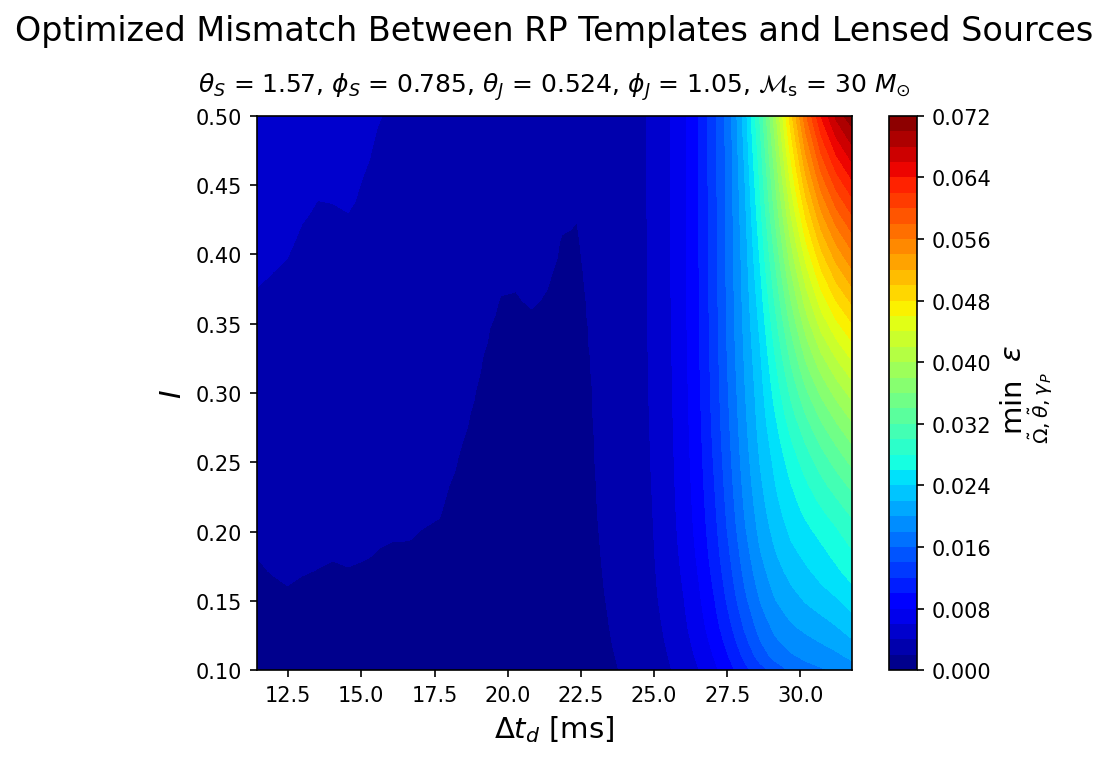

In [7]:
ep_min_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_min_mtx[r, c] = data[td][I]["stats"]["ep_min"]

plt.contourf(X * 1e3, Y, ep_min_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

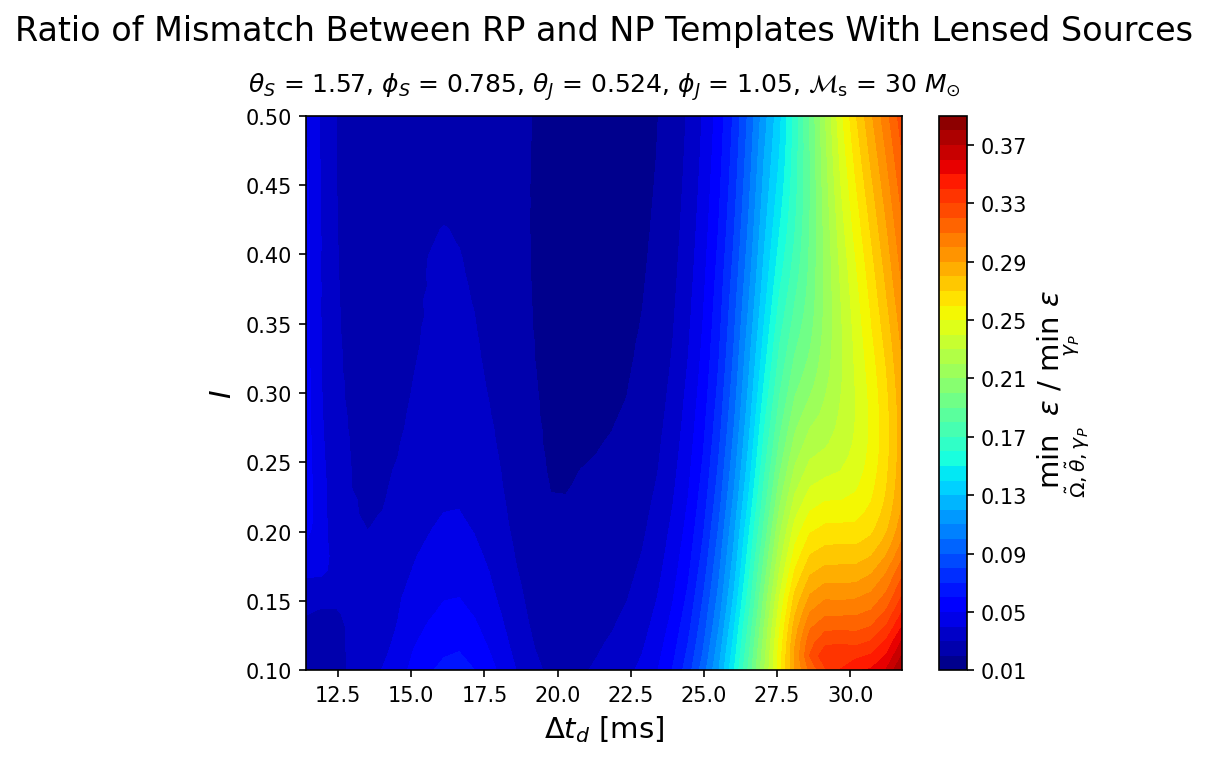

In [8]:
# create a contour that shows the ratio between the two above
ep_ratio_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_ratio_mtx[r, c] = ep_min_mtx[r, c] / ep_NP_L_mtx[r, c]

plt.contourf(X * 1e3, Y, ep_ratio_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$ / $\min_{\gamma_P}$ $\epsilon$",
    size=14,
)
plt.suptitle(
    "Ratio of Mismatch Between RP and NP Templates With Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

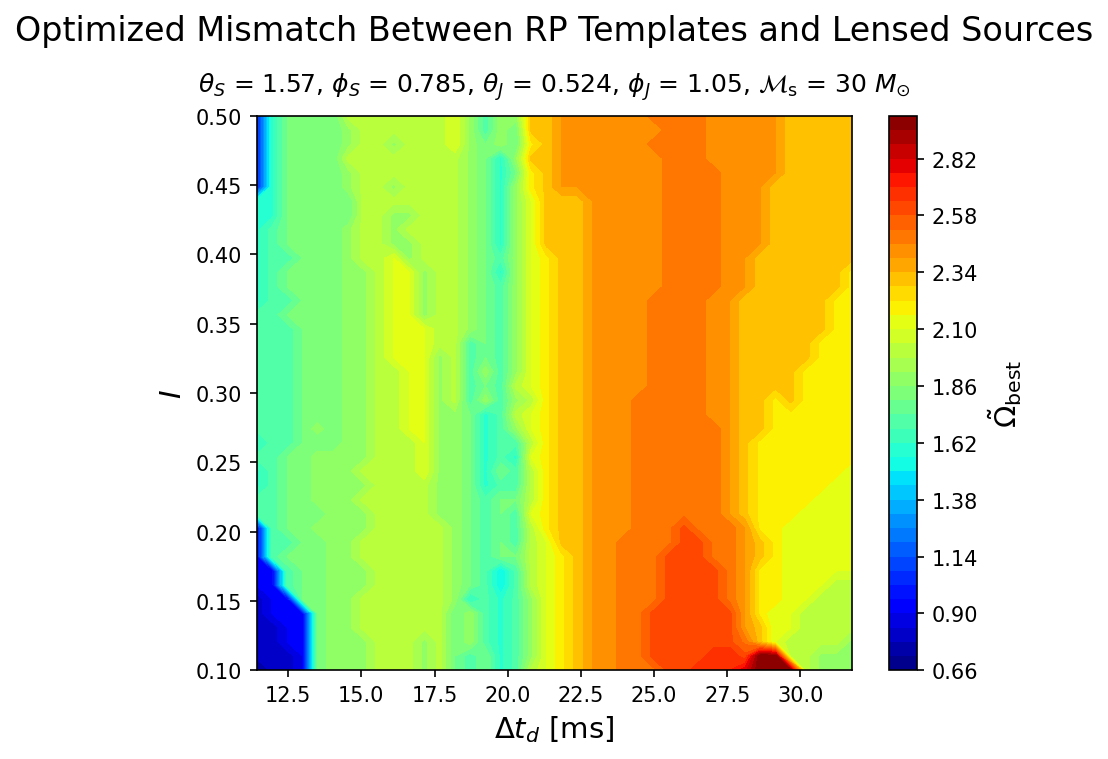

In [9]:
best_omega_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_omega_mtx[r, c] = data[td][I]["stats"]["ep_min_omega_tilde"]

plt.contourf(X * 1e3, Y, best_omega_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\Omega}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

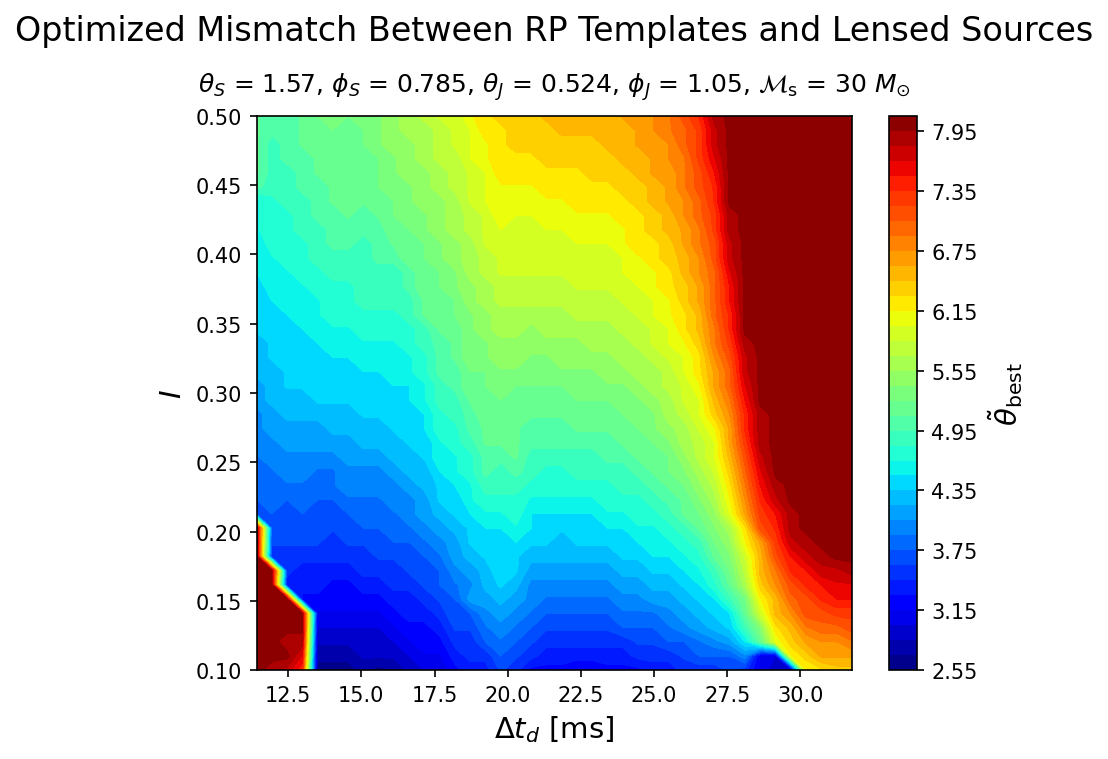

In [10]:
best_theta_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_theta_mtx[r, c] = data[td][I]["stats"]["ep_min_theta_tilde"]

plt.contourf(X * 1e3, Y, best_theta_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\theta}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

# as a function of $\Delta t_d$ while fixing $I$

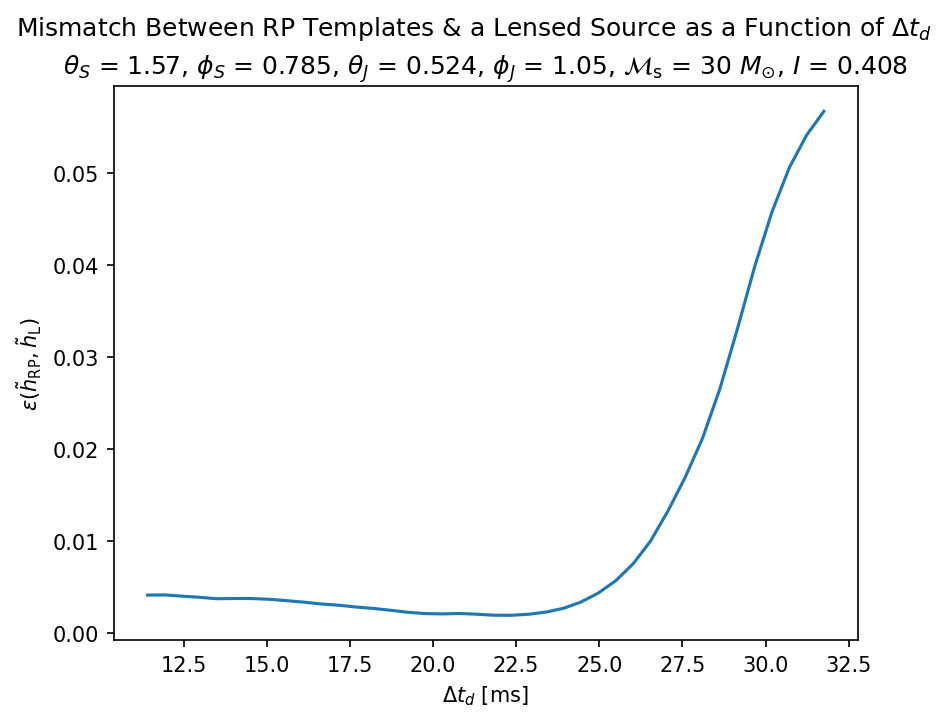

In [39]:
r = 5
td_ep_min_arr = ep_min_mtx[r, :]

plt.plot(td_arr * 1e3, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [40]:
td_best_omega_arr = best_omega_mtx[r, :]
omega_min_err_mtx = np.zeros_like(X)
omega_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        omega_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["omega_tilde_err"])
        omega_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["omega_tilde_err"])

omega_err_arr = np.array(
    [
        td_best_omega_arr - omega_min_err_mtx[r, :],
        omega_max_err_mtx[r, :] - td_best_omega_arr,
    ]
)

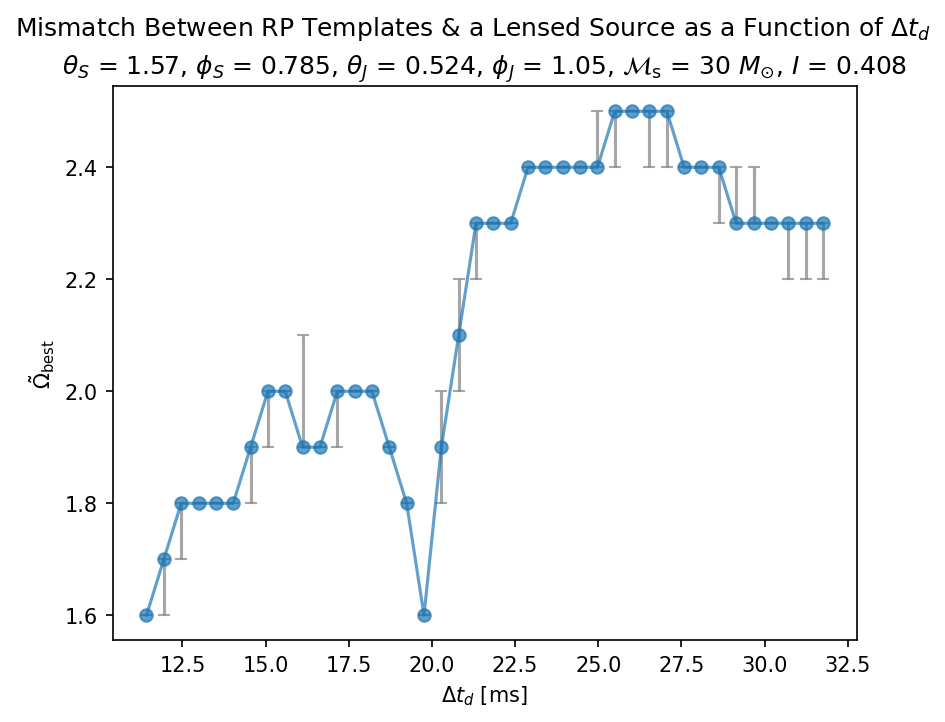

In [41]:
plt.errorbar(
    td_arr * 1e3,
    td_best_omega_arr,
    yerr=omega_err_arr,
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [42]:
td_best_theta_arr = best_theta_mtx[r, :]
theta_min_err_mtx = np.zeros_like(X)
theta_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        theta_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["theta_tilde_err"])
        theta_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["theta_tilde_err"])

theta_err_arr = np.array(
    [
        td_best_theta_arr - theta_min_err_mtx[r, :],
        theta_max_err_mtx[r, :] - td_best_theta_arr,
    ]
)

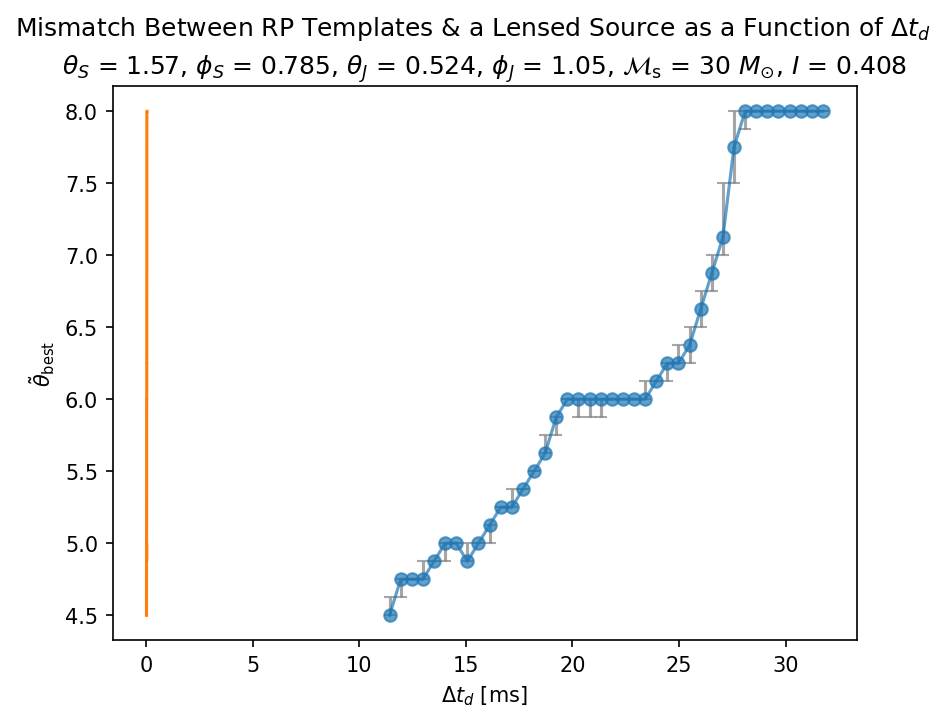

In [43]:
plt.errorbar(
    td_arr * 1e3,
    td_best_theta_arr,
    yerr=theta_err_arr,
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.plot(td_arr, td_best_theta_arr, label=r"$\~{\theta}_{\rm best}$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

IntSlider(value=0, description='td index:', max=39)

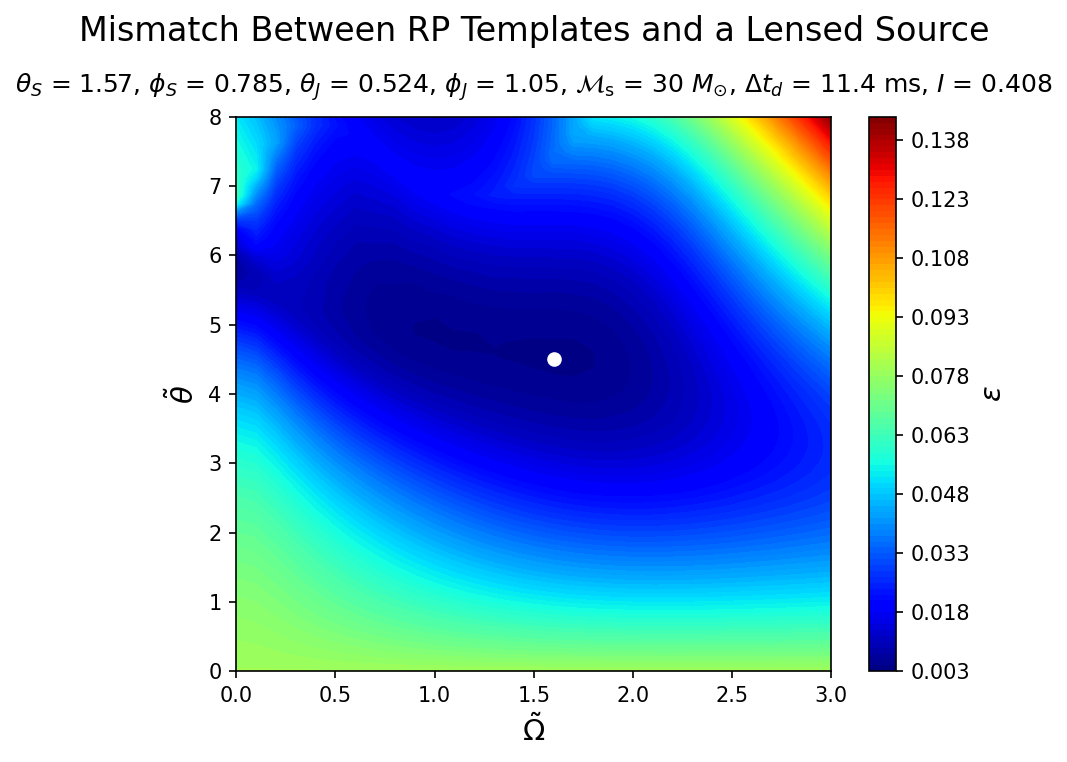

In [44]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
td_slider = widgets.IntSlider(
    min=0, max=len(td_arr) - 1, step=1, value=0, description="td index:"
)
display(td_slider)


def update_plot(val):
    clear_output(wait=True)
    display(td_slider)
    td = td_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td], I_arr[r])


td_slider.observe(update_plot, names="value")

# as a function of $I$ while fixing $\Delta t_d$

In [22]:
c = 2
data_I = data[td_arr[c]]

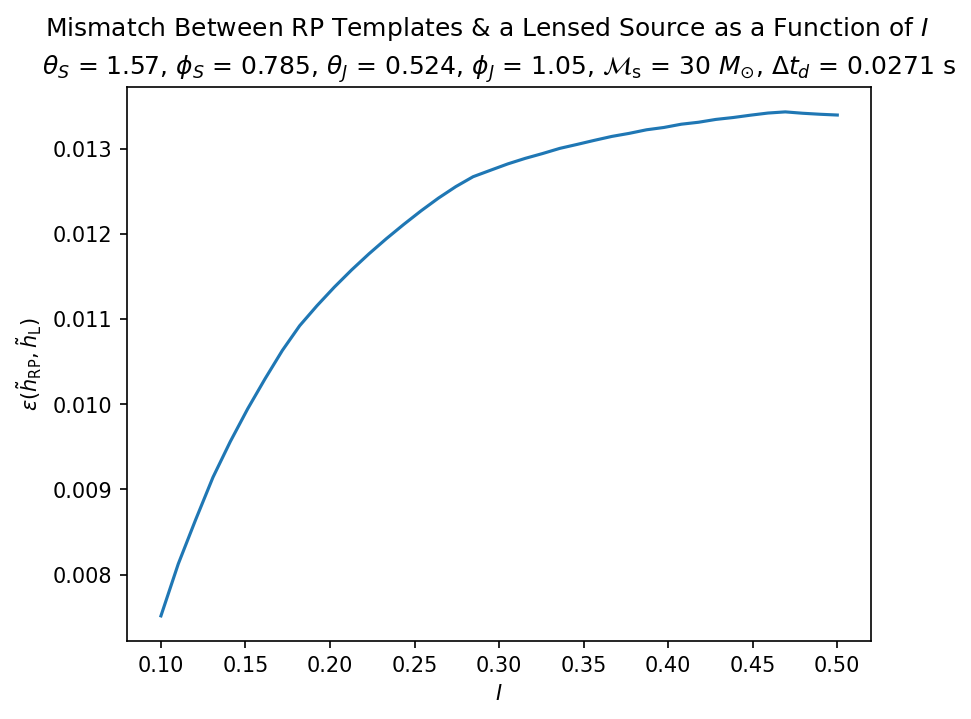

In [23]:
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

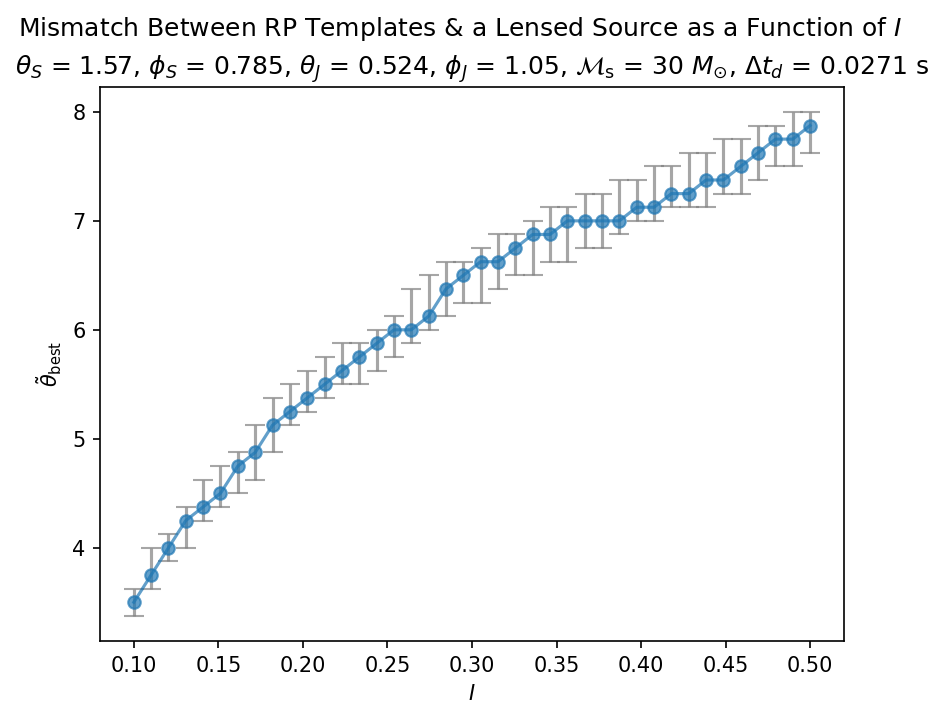

In [24]:
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

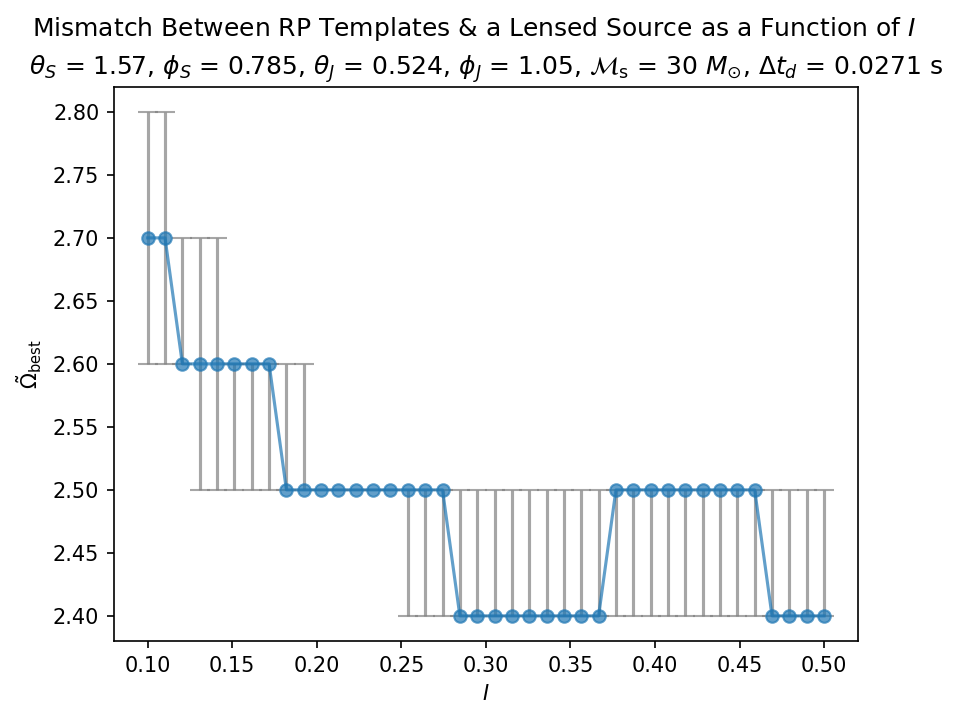

In [25]:
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

In [21]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
I_slider = widgets.IntSlider(
    min=0, max=len(I_arr) - 1, step=1, value=0, description="I index:"
)
display(I_slider)


def update_plot(val):
    clear_output(wait=True)
    display(I_slider)
    I = I_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td_arr[c]], I)  # type: ignore


I_slider.observe(update_plot, names="value")

IntSlider(value=0, description='I index:', max=39)

# waveform comparison

In [28]:
# make data_td like data_I but with td as the key
I = I_arr[r]
data_td = {}
for td in td_arr:
    data_td[td] = data[td][I]

data_td["source_params"] = data[td_arr[0]]["source_params"]

idx = -4.74163e-09, phi = 1.66728e-08, both should be ~0 if get_updated_mismatch_results is True


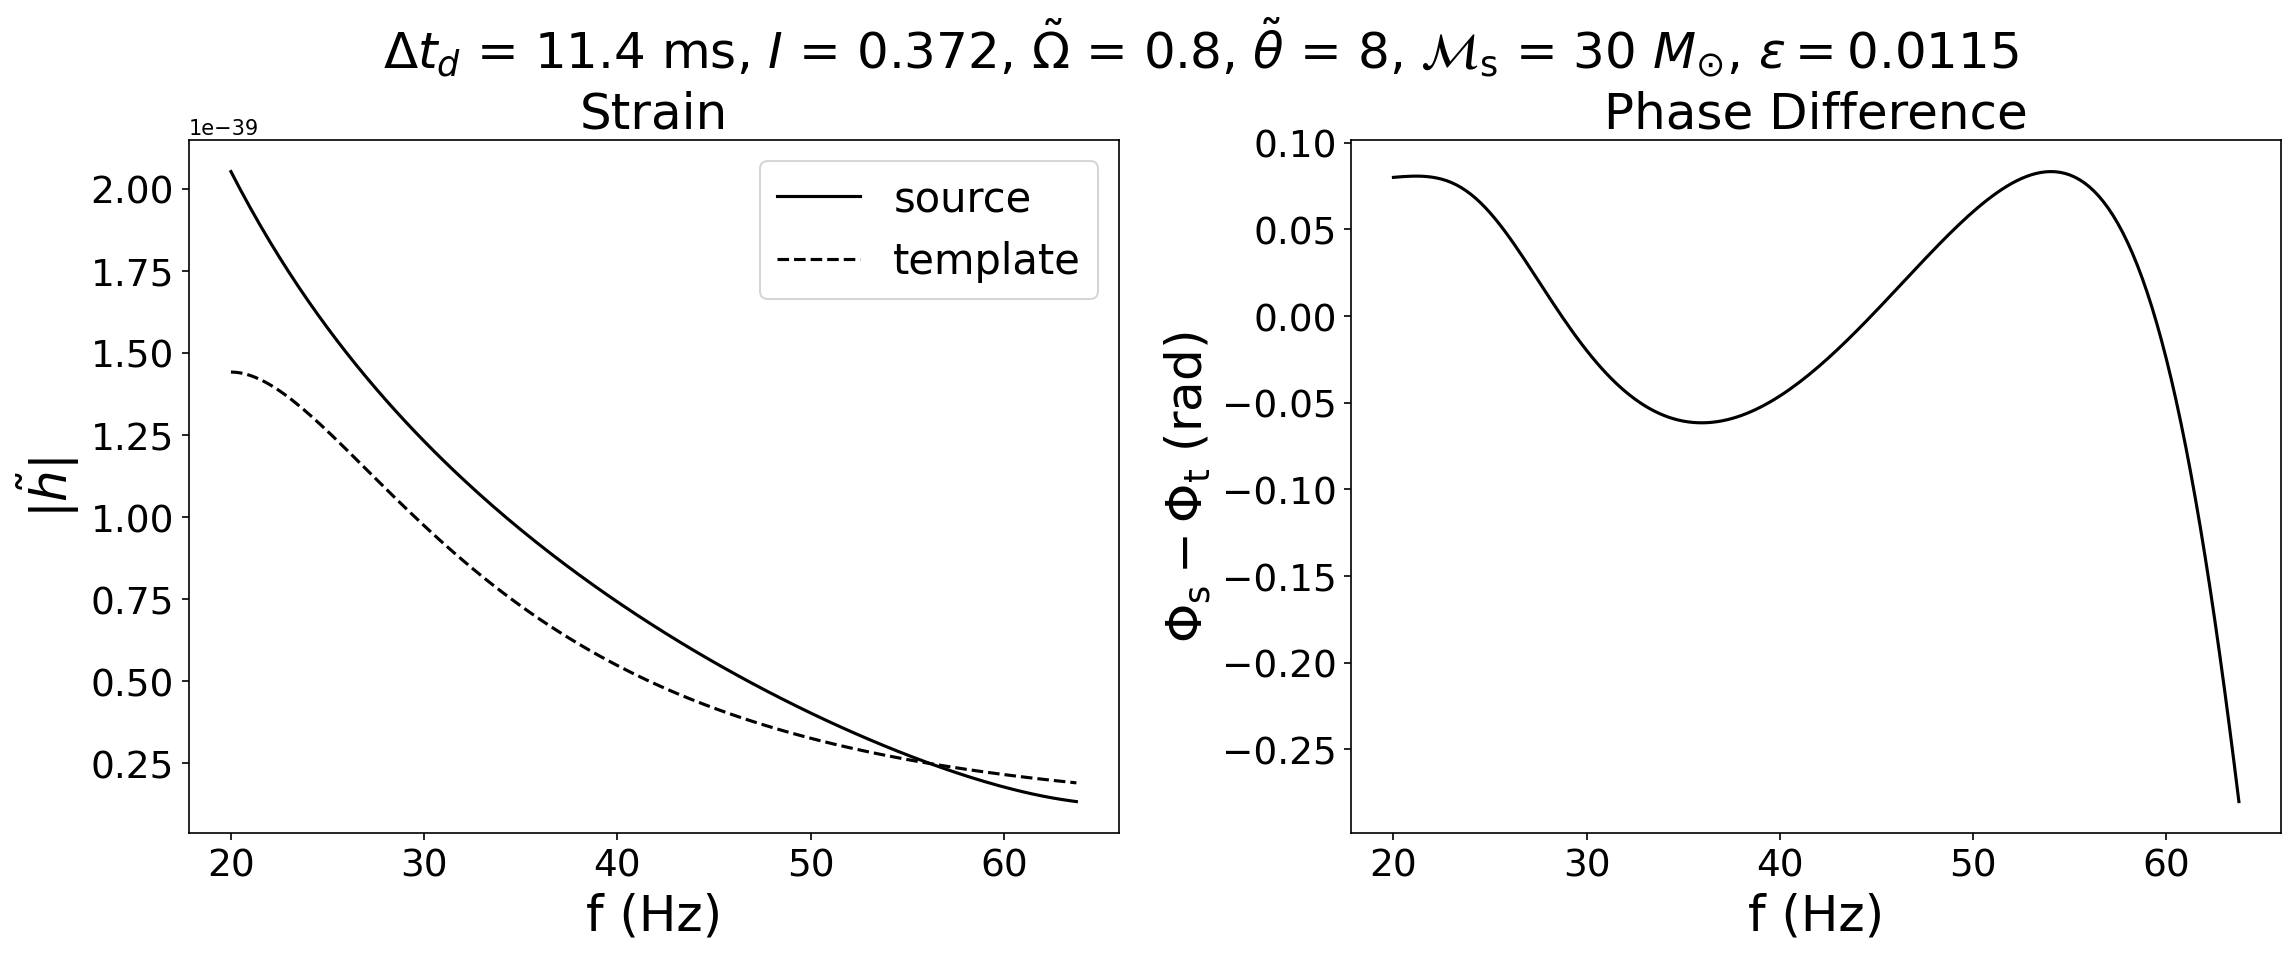

idx = -4.0277e-09, phi = -2.90184e-08, both should be ~0 if get_updated_mismatch_results is True


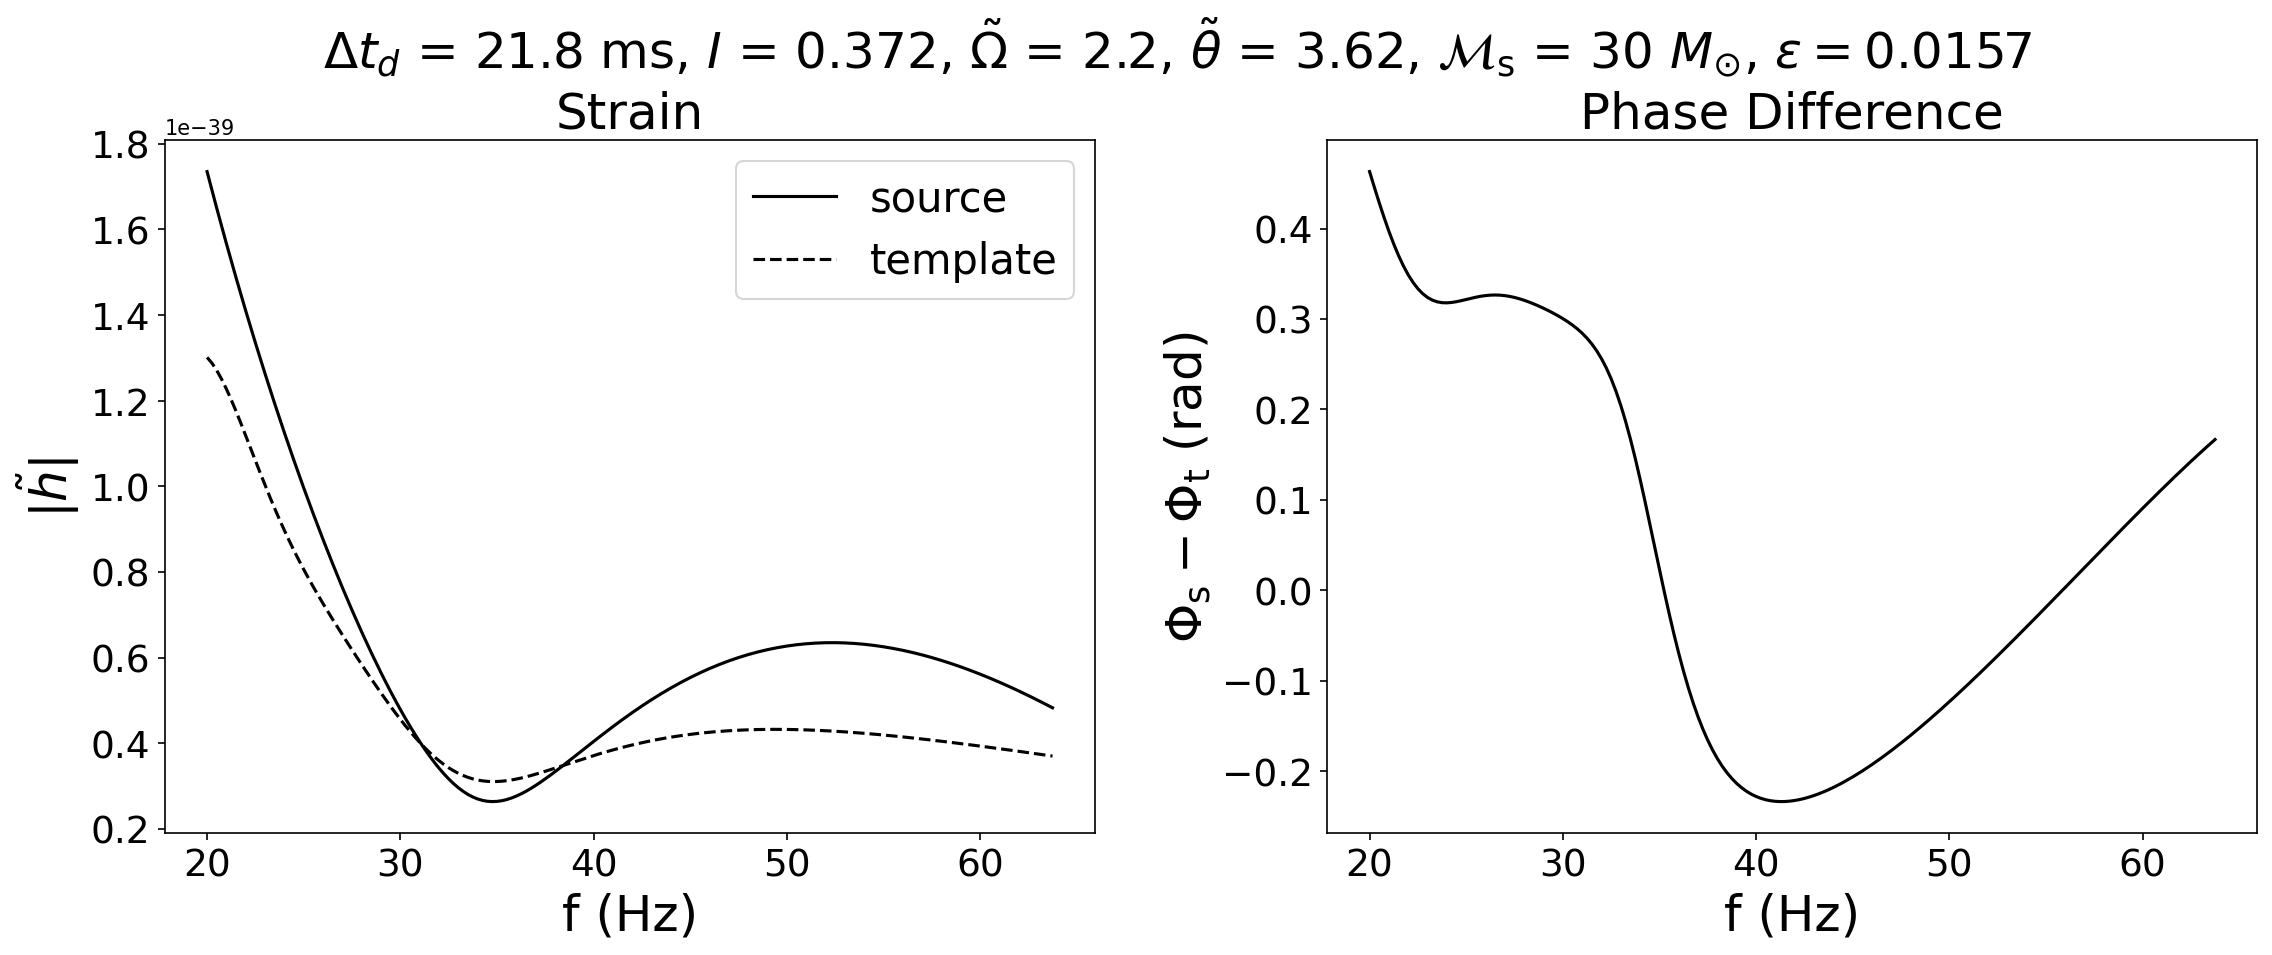

In [33]:
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = get_MLz_from_td(td_arr, data_td["source_params"]["y"])

for i in range(0, len(MLz_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()